In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
import random
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, concatenate
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow import keras

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers import concatenate

from keras.datasets import cifar10
import string
import csv

## Acquiring Dataset

In [2]:
data_dir = 'C:/Users/Hp/Desktop/Traffic-Sign-Recognisation-Using-Deep-Learning-master/'
train_path = 'C:/Users/Hp/Desktop/Traffic-Sign-Recognisation-Using-Deep-Learning-master/Train'
test_path = 'C:/Users/Hp/Desktop/Traffic-Sign-Recognisation-Using-Deep-Learning-master/Test'

In [3]:
n = pd.read_csv(data_dir + '/Train.csv')
n_classes = len(set(n['ClassId'].values))
print(f"Number of classes: {n_classes}")

Number of classes: 43


In [4]:
# Labels Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing Dataset

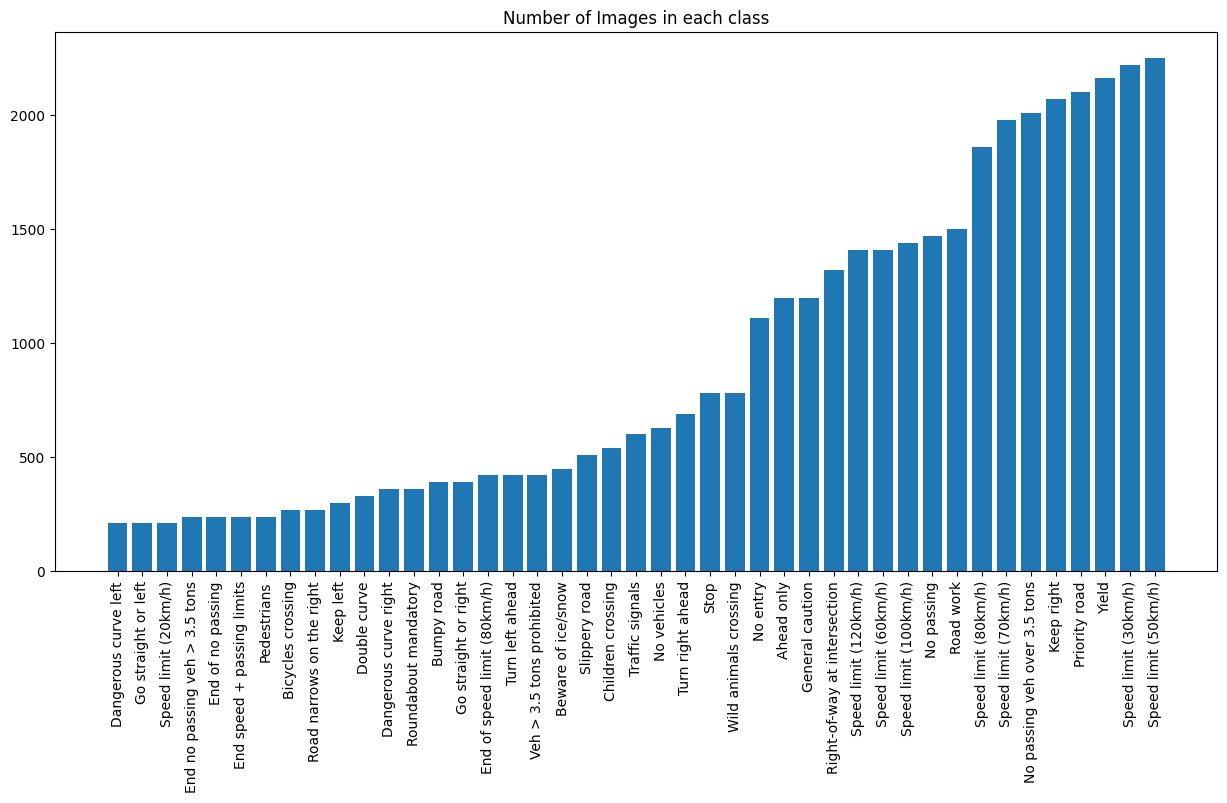

In [5]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(15,7))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.title("Number of Images in each class")
plt.show()

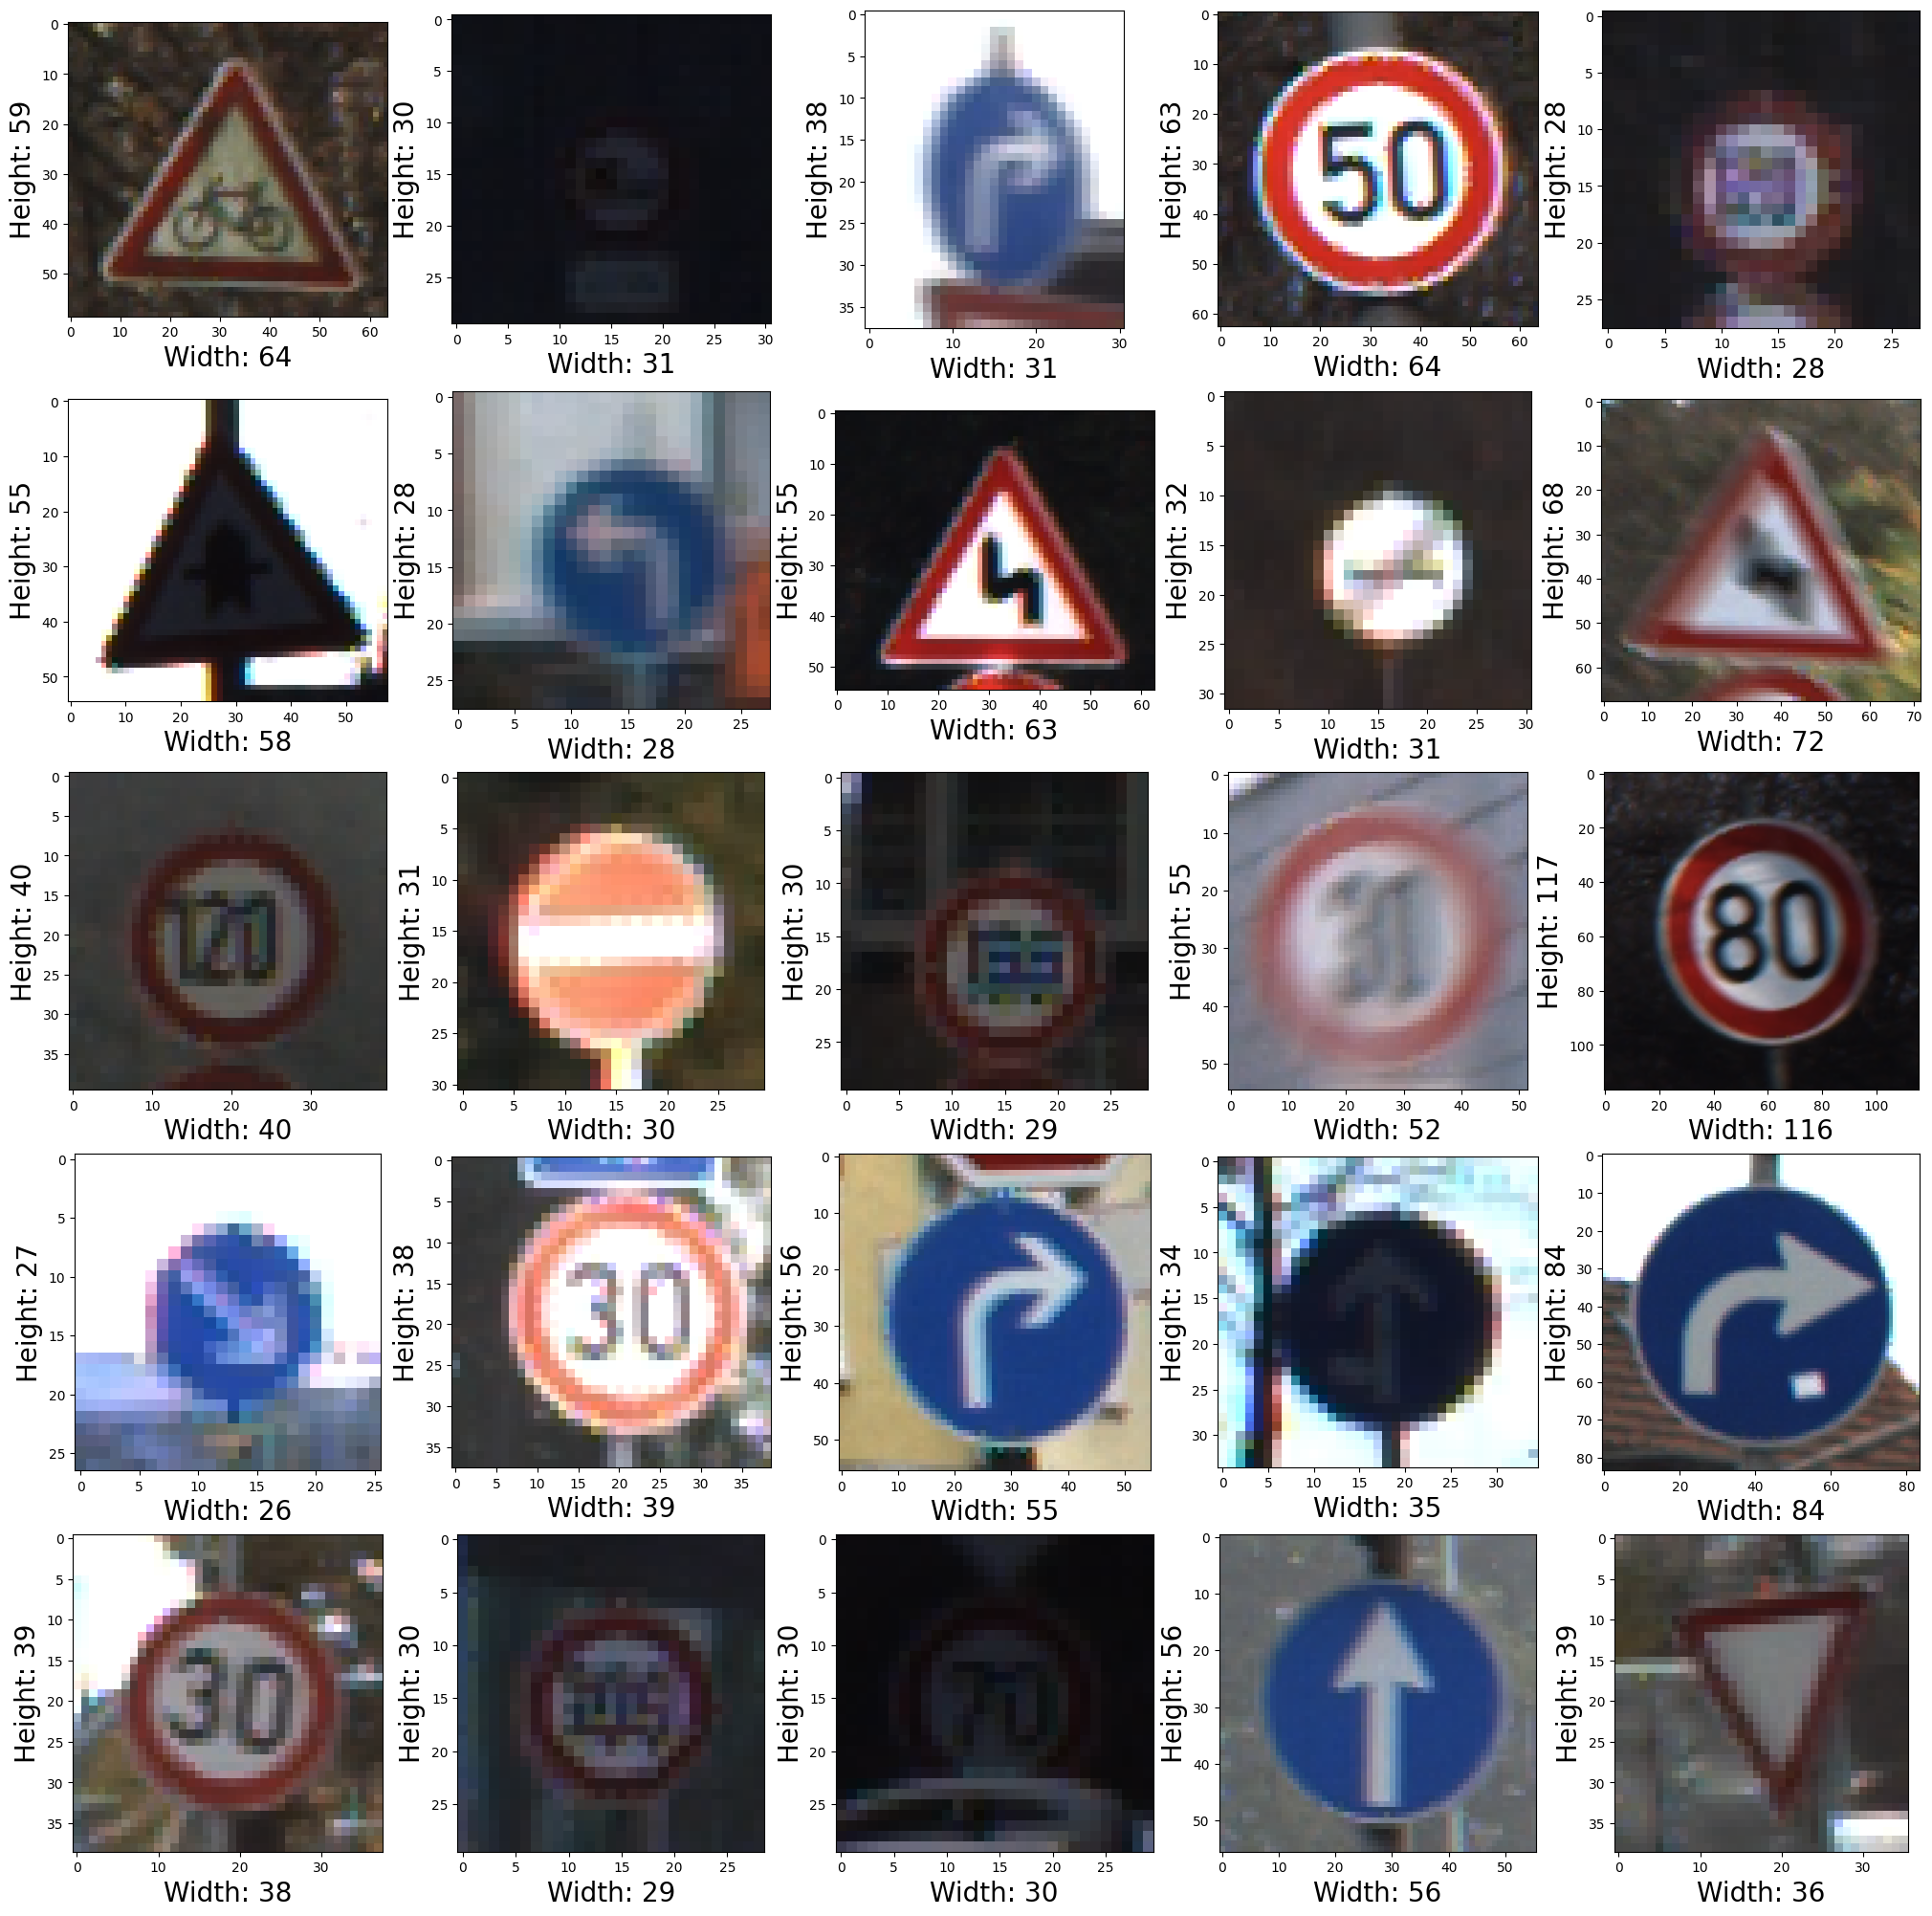

In [6]:
import random
from matplotlib.image import imread
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    
    # Randomly choose an image path
    random_img_path = np.random.choice(imgs)
    
    # Construct the full path using os.path.join
    random_img_path = os.path.join(data_dir, random_img_path)
    
    # Attempt to read the image
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=False)
    plt.xlabel("Width: {}".format(rand_img.shape[1]), fontsize=20)
    plt.ylabel("Height: {}".format(rand_img.shape[0]), fontsize=20)


## Creating Dataset

In [7]:
data = []
labels = []

for i in range(n_classes):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
      image = cv2.imread(path + '/' + img)
      rz = cv2.resize(image, (32,32), interpolation = cv2.INTER_NEAREST)
      data.append(np.array(rz))
      labels.append(i)

data = np.array(data)
labels = np.array(labels)
print(f"data shape: {data.shape}")
print(f"labels shape: {labels.shape}")

data shape: (39209, 32, 32, 3)
labels shape: (39209,)


(32, 32, 3)


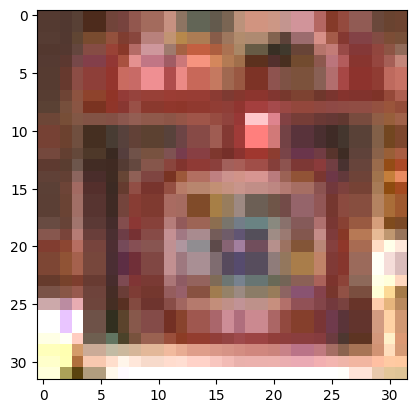

1


In [8]:
print(data[300].shape)
img = cv2.cvtColor(data[300], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(labels[300])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=41, shuffle=True)

X_train = X_train/255     # Normalizing Values
X_val = X_val/255         # Normalizing Values
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [10]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_val = keras.utils.to_categorical(y_val, n_classes)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

y_train.shape (31367, 43)
y_valid.shape (7842, 43)


In [11]:
def AlexNet(X):
  AlexNet = Sequential()

  # 1st Convolution Layer
  AlexNet.add(Conv2D(filters=96, input_shape=(X.shape[1],X.shape[2],X.shape[3]), kernel_size=(5,5), activation='relu', strides=(1,1), padding='valid'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # 2nd Convolution Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', strides=(1,1), padding='valid'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # 3rd Convolution Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

  # 4th Convolution Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

  # 5th Convolution Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

  # Fully Connected Layers
  AlexNet.add(Flatten())
  AlexNet.add(Dense(400, activation='relu'))
  AlexNet.add(Dropout(0.2))
  AlexNet.add(Dense(160, activation='relu'))
  AlexNet.add(Dropout(0.2))
  AlexNet.add(Dense(43, activation='softmax'))

  return AlexNet

model_alex = AlexNet(X_train)
model_alex.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 96)        7296      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 256)       221440    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)        

## Visualizing Model


In [ ]:
import visualkeras
from PIL import ImageFont

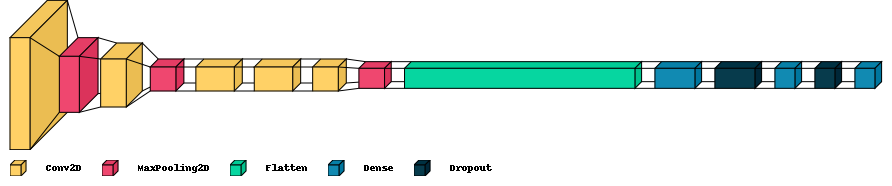

In [ ]:
visualkeras.layered_view(model_alex, legend=True, spacing = 20) 

## Training

In [12]:
# Parameters
bs = 32
ep = 15
lr = 0.001

# Use the legacy optimizer
opt = tf.keras.optimizers.legacy.Adam(learning_rate=lr, decay=lr / (ep * 0.5))
model_alex.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Augmenting Training Data
data_gen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history_alex = model_alex.fit(data_gen.flow(X_train, y_train, batch_size=bs), epochs=ep, validation_data=(X_val, y_val))

Epoch 1/15


981/981 [==============================] - 467s 471ms/step - loss: 2.8054 - accuracy: 0.2045 - val_loss: 1.4778 - val_accuracy: 0.5059
Epoch 2/15
981/981 [==============================] - 490s 499ms/step - loss: 1.0285 - accuracy: 0.6565 - val_loss: 0.4907 - val_accuracy: 0.8301
Epoch 3/15
981/981 [==============================] - 822s 837ms/step - loss: 0.4388 - accuracy: 0.8570 - val_loss: 0.1665 - val_accuracy: 0.9482
Epoch 4/15
981/981 [==============================] - 795s 810ms/step - loss: 0.2599 - accuracy: 0.9158 - val_loss: 0.1108 - val_accuracy: 0.9633
Epoch 5/15
981/981 [==============================] - 783s 798ms/step - loss: 0.1938 - accuracy: 0.9395 - val_loss: 0.1020 - val_accuracy: 0.9672
Epoch 6/15
981/981 [==============================] - 775s 790ms/step - loss: 0.1483 - accuracy: 0.9531 - val_loss: 0.0664 - val_accuracy: 0.9795
Epoch 7/15
981/981 [==============================] - 782s 797ms/step - loss: 0.1192 - accuracy: 0.9626 - val_loss: 0.0688

In [13]:
model_alex.save('AlexNet.h5')

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
reconstructed_model = keras.models.load_model("AlexNet.h5")

## Evaluating Model

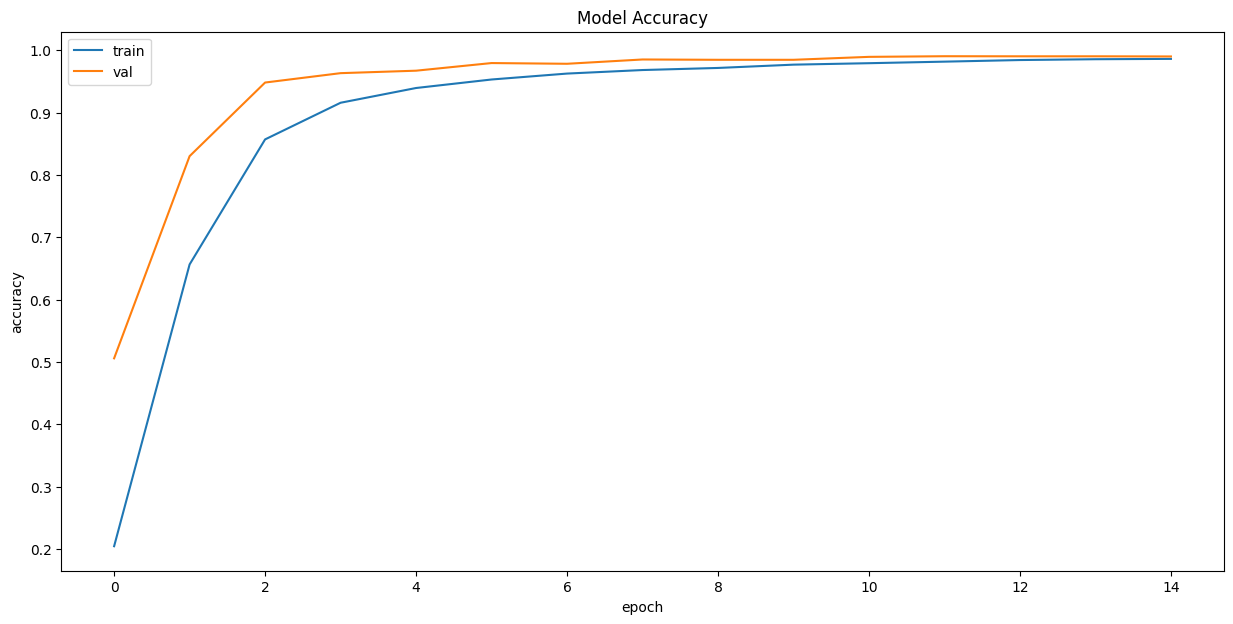

In [15]:
plt.figure(figsize=(15,7))
plt.plot(history_alex.history['accuracy'])
plt.plot(history_alex.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

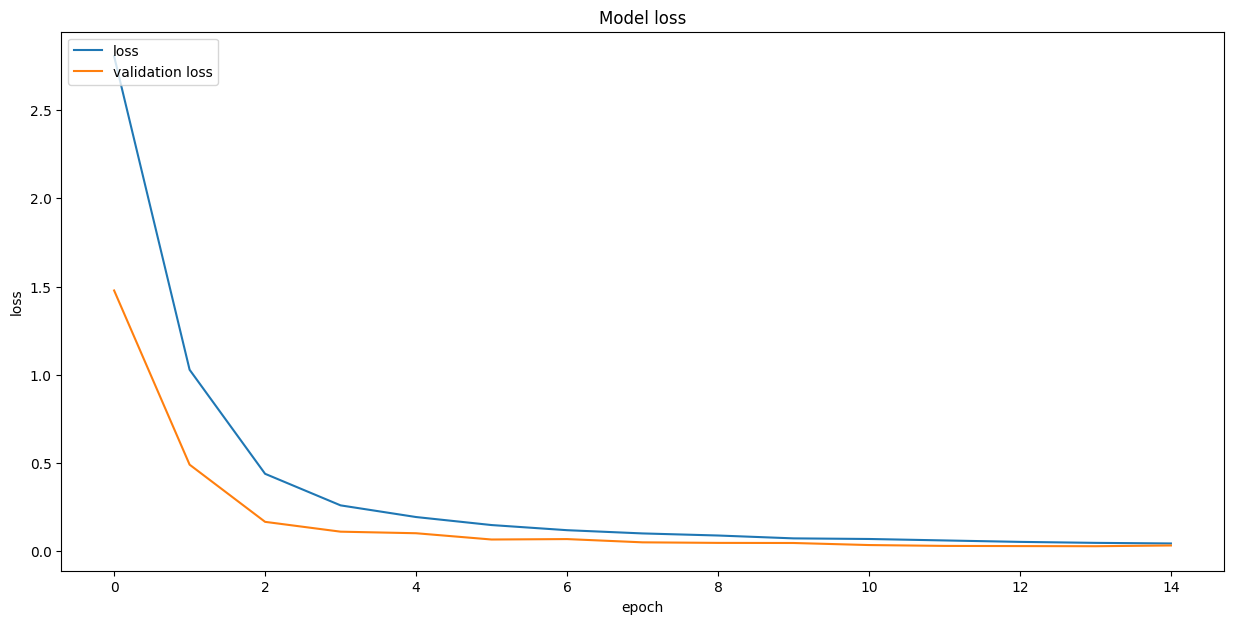

In [16]:
plt.figure(figsize=(15,7))
plt.plot(history_alex.history['loss'])
plt.plot(history_alex.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

In [17]:
test = pd.read_csv(data_dir + '/Test.csv')

test_labels = test["ClassId"].values
test_imgs = test["Path"].values
print(len(test_imgs))
test_data =[]

for img in test_imgs:
  image = cv2.imread(data_dir+'/'+img)
  rz = cv2.resize(image, (32, 32), interpolation = cv2.INTER_NEAREST)
  test_data.append(rz)

X_test = np.array(test_data)
X_test = X_test/255         # Normalizing Values

print("X_test.shape", X_test.shape)

12630
X_test.shape (12630, 32, 32, 3)


In [18]:
from sklearn.metrics import accuracy_score
pred = reconstructed_model.predict(X_test)
pred_classes=np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred_classes)*100)

395/395 [==============================] - 88s 219ms/step
Test Data accuracy:  93.80047505938242


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.97      0.98      0.97       720
           2       0.92      0.98      0.95       750
           3       0.97      0.97      0.97       450
           4       0.99      0.97      0.98       660
           5       0.96      0.95      0.95       630
           6       0.98      0.90      0.94       150
           7       0.99      0.94      0.97       450
           8       0.95      0.98      0.97       450
           9       1.00      0.99      0.99       480
          10       1.00      1.00      1.00       660
          11       0.95      0.98      0.96       420
          12       0.99      1.00      0.99       690
          13       1.00      1.00      1.00       720
          14       0.93      1.00      0.96       270
          15       0.99      0.97      0.98       210
          16       0.98      1.00      0.99       150
          17       1.00    

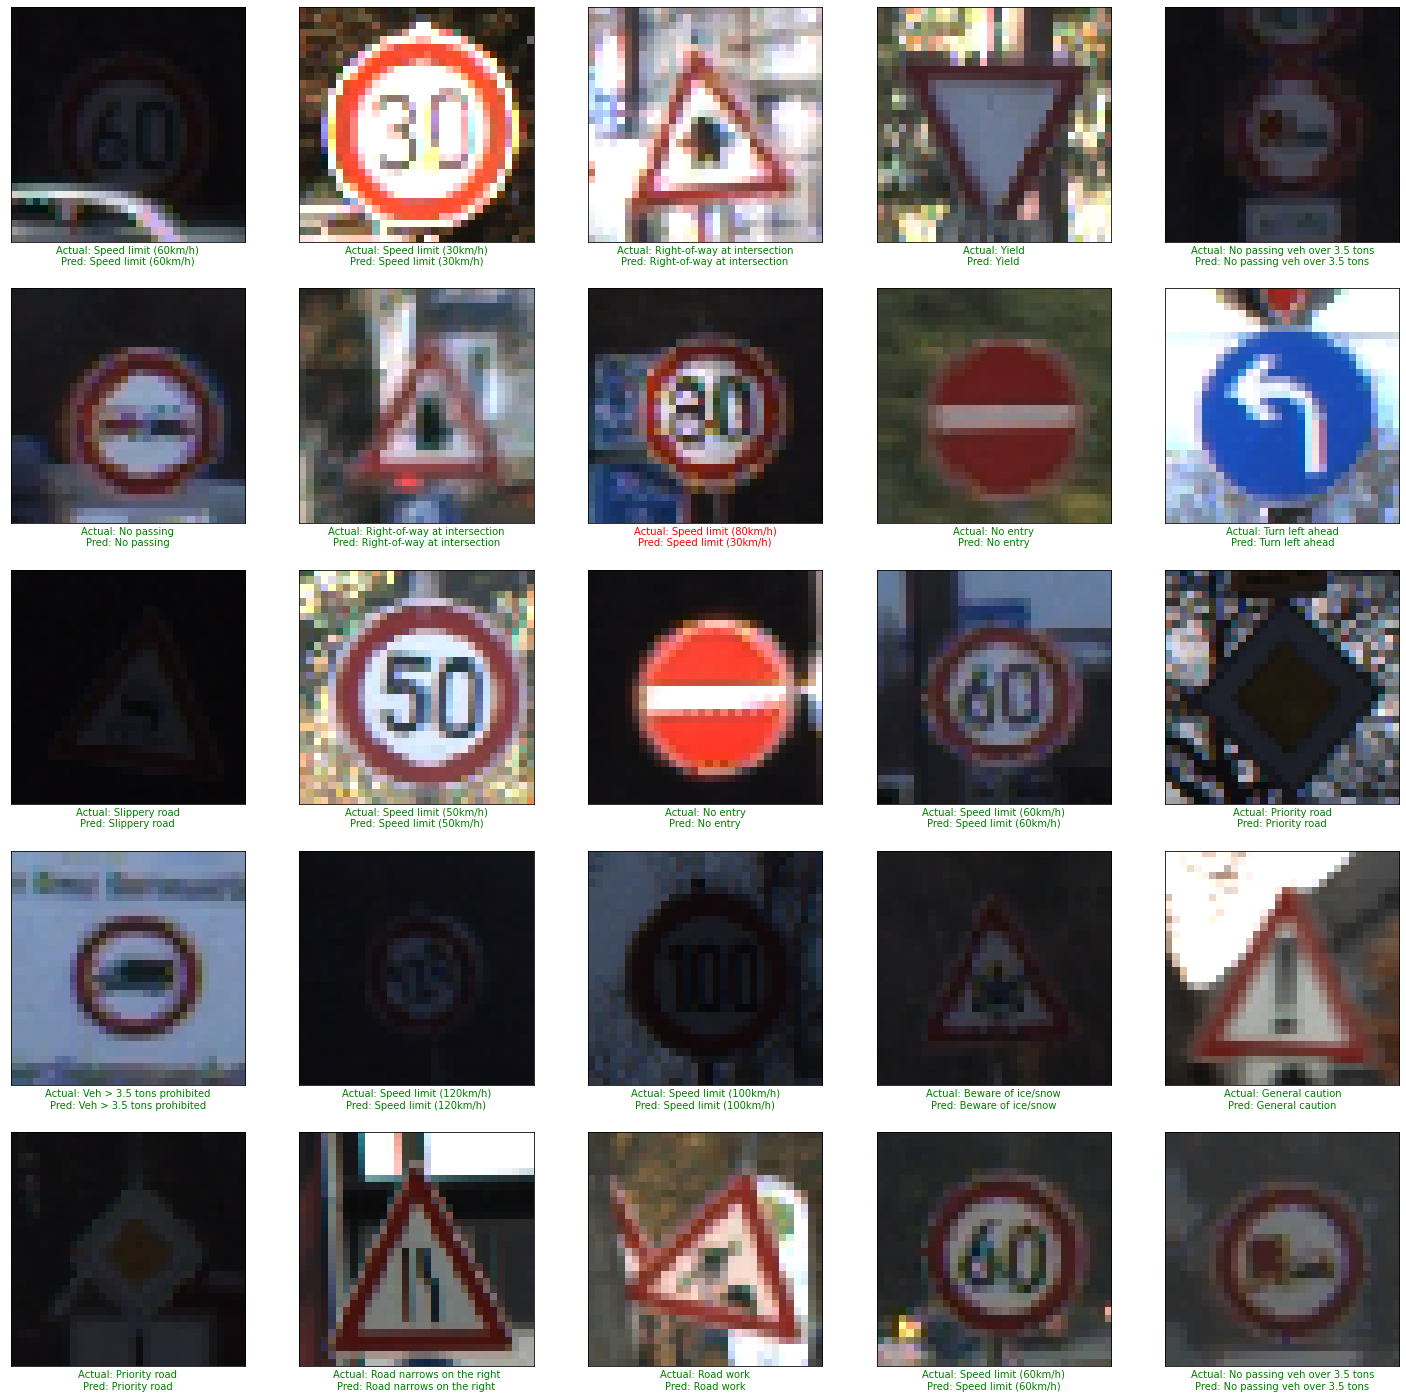

In [ ]:
plt.figure(figsize = (25, 25))

start_idx = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_classes[start_idx + i + 23]
    actual = test_labels[start_idx + i + 23]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.imshow(cv2.cvtColor(np.array(X_test[start_idx + i + 23], dtype=np.float32), cv2.COLOR_BGR2RGB))
    plt.xlabel(f'Actual: {classes.get(actual)}''\n'f'Pred: {classes.get(prediction)}', color = col)
plt.show()